In [2]:
import pandas as pd
import numpy as np
from os import listdir
import cv2 # this package should be installed: was also required in the previous week's materials (look in that notebook for the install command)
                    # assuming this is installed by now, otherwise inside a cell type: !pip install opencv-python
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
dir_struct = '/content/drive/MyDrive/faces/'


In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
!pip install opencv-python

In [6]:
class_names = ['No Glasses', 'Medical Glasses', 'Sun Glasses']


df  = pd.read_csv("/content/drive/MyDrive/MLProject/annotations.csv")
'''
print('Number of images: ', df.shape[0])
print('The proportion of glass labels: ')
# you may see equal proportion: logical since we have randomly assigned the label
df.groupby(['Glasses']).count()
'''
print(df)


                  image_name  wrinkles  freakles  glasses  hair_color  hair_top
0        emotionet_3_136.jpg       0.0       0.0      0.0         0.0       2.0
1        emotionet_3_144.jpg       0.0       0.0      0.0         6.0       2.0
2        emotionet_3_221.jpg       0.0       0.0      0.0         1.0       2.0
3        emotionet_3_282.jpg       0.0       0.0      0.0         2.0       1.0
4        emotionet_3_370.jpg       0.0       0.0      0.0         3.0       1.0
...                      ...       ...       ...      ...         ...       ...
1886  emotionet_3_263230.jpg       1.0       0.0      1.0         3.0       3.0
1887  emotionet_3_263314.jpg       0.0       0.0      0.0         1.0       3.0
1888  emotionet_3_263361.jpg       0.0       0.0      0.0         3.0       2.0
1889  emotionet_3_263366.jpg       0.0       0.0      0.0         1.0       2.0
1890  emotionet_3_263417.jpg       1.0       0.0      0.0         1.0       1.0

[1891 rows x 6 columns]


In [7]:
import os.path
glasses_data=df
#glasses_labels.assign(new_col = dataset_images)
image_lst = [] # this list will hold all the images
#for i in range(glasses_labels.shape[0]): # read the image one by on
image_lst=glasses_data['image_name']
glasses_data=glasses_data.drop(columns=["wrinkles","freakles", "hair_color","hair_top"])
print(glasses_data)

count=0
image_lst2=[]
for i in range(len(image_lst)):
  path=glasses_data.iloc[i]['image_name']
  path=dir_struct+path
  print(path)
  count=count+1
  if os.path.isfile(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (50,75), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm                                                                                         # this actually ensures all the features [pixel values] will be of same size
    image_lst2.append(image) # appending the read image to a list
  else :
    image_lst2.append("Empty")


print(count)



                  image_name  glasses
0        emotionet_3_136.jpg      0.0
1        emotionet_3_144.jpg      0.0
2        emotionet_3_221.jpg      0.0
3        emotionet_3_282.jpg      0.0
4        emotionet_3_370.jpg      0.0
...                      ...      ...
1886  emotionet_3_263230.jpg      1.0
1887  emotionet_3_263314.jpg      0.0
1888  emotionet_3_263361.jpg      0.0
1889  emotionet_3_263366.jpg      0.0
1890  emotionet_3_263417.jpg      0.0

[1891 rows x 2 columns]
/content/drive/MyDrive/faces/emotionet_3_136.jpg
/content/drive/MyDrive/faces/emotionet_3_144.jpg
/content/drive/MyDrive/faces/emotionet_3_221.jpg
/content/drive/MyDrive/faces/emotionet_3_282.jpg
/content/drive/MyDrive/faces/emotionet_3_370.jpg
/content/drive/MyDrive/faces/emotionet_3_401.jpg
/content/drive/MyDrive/faces/emotionet_3_473.jpg
/content/drive/MyDrive/faces/emotionet_3_474.jpg
/content/drive/MyDrive/faces/emotionet_3_525.jpg
/content/drive/MyDrive/faces/emotionet_3_559.jpg
/content/drive/MyDrive/faces/

In [8]:
glasses_data['image'] = image_lst2

In [ ]:
glasses_data

,image_name,glasses,image
0,emotionet_3_136.jpg,0.0,"[[[162, 133, 100], [154, 115, 132], [163, 124,..."
1,emotionet_3_144.jpg,0.0,"[[[60, 62, 58], [58, 59, 56], [65, 67, 64], [7..."
2,emotionet_3_221.jpg,0.0,"[[[74, 59, 61], [63, 50, 54], [55, 44, 47], [4..."
3,emotionet_3_282.jpg,0.0,"[[[94, 66, 59], [21, 14, 14], [27, 16, 17], [2..."
4,emotionet_3_370.jpg,0.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...
1886,emotionet_3_263230.jpg,1.0,"[[[46, 74, 121], [46, 73, 119], [41, 67, 110],..."
1887,emotionet_3_263314.jpg,0.0,"[[[32, 46, 32], [30, 35, 25], [19, 21, 14], [1..."
1888,emotionet_3_263361.jpg,0.0,"[[[74, 73, 69], [74, 73, 69], [74, 73, 69], [7..."
1889,emotionet_3_263366.jpg,0.0,"[[[227, 226, 232], [227, 226, 232], [226, 225,..."


**Cleaning Data**

**Row 527 has a corrupted image I want to drop before starting, it has Empty value from the previous code**

In [9]:
#print(glasses_data[glasses_data['image'] =="Empty"])
#print(glasses_data)
#Delete the image that does not exist
#df = df.drop(df[df.score < 50].index)
#print (glasses_data.loc[glasses_data.image=="empty"])
glasses_data= glasses_data.drop([527])
#print(glasses_data[glasses_data['image'] =="Empty"])
# 

**Remove empty**

In [10]:
glasses_data=glasses_data.dropna()
print(glasses_data.isna().sum().sum())

0


In [ ]:
glasses_data

,image_name,glasses,image
0,emotionet_3_136.jpg,0.0,"[[[162, 133, 100], [154, 115, 132], [163, 124,..."
1,emotionet_3_144.jpg,0.0,"[[[60, 62, 58], [58, 59, 56], [65, 67, 64], [7..."
2,emotionet_3_221.jpg,0.0,"[[[74, 59, 61], [63, 50, 54], [55, 44, 47], [4..."
3,emotionet_3_282.jpg,0.0,"[[[94, 66, 59], [21, 14, 14], [27, 16, 17], [2..."
4,emotionet_3_370.jpg,0.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...
1886,emotionet_3_263230.jpg,1.0,"[[[46, 74, 121], [46, 73, 119], [41, 67, 110],..."
1887,emotionet_3_263314.jpg,0.0,"[[[32, 46, 32], [30, 35, 25], [19, 21, 14], [1..."
1888,emotionet_3_263361.jpg,0.0,"[[[74, 73, 69], [74, 73, 69], [74, 73, 69], [7..."
1889,emotionet_3_263366.jpg,0.0,"[[[227, 226, 232], [227, 226, 232], [226, 225,..."


**Convert to numpy array**

In [11]:
#train_array=np.zeros((1509,150,100, 3))
#test_array=np.zeros((387,150,100, 3))

all_images=np.zeros((1887,
                     75,50,3))
#print(glasses_data.iloc[1]['image'].shape)


for i in range(len(glasses_data)):
  all_images[i]=glasses_data.iloc[i]['image']





In [12]:
print(all_images.shape)

(1887, 75, 50, 3)


**Splitting Images**

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [14]:
labels=glasses_data.drop(columns=["image","image_name"])


In [15]:
labels=labels.to_numpy()

In [38]:
train, test,train_labels, test_labels = train_test_split(all_images,labels, test_size=0.20, random_state=42,stratify=labels)


In [17]:
print(f'Shape of the training data: {train.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (1509, 75, 50, 3)
Shape of the training target: (1509, 1)
Shape of the test data: (378, 75, 50, 3)
Shape of the test target: (378, 1)


**Data Histogram**

In [32]:
np.histogram(train_labels, bins=3, range=None, normed=None, weights=None, density=None) 

(array([1363,  127,   38]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]))

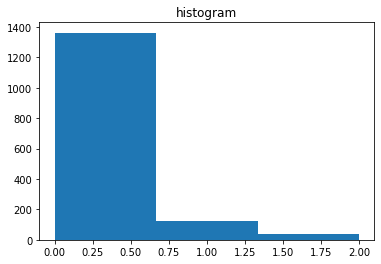

In [33]:
plt.hist(train_labels, bins = 3) 
plt.title("histogram") 
plt.show()


**Augmentation for  Sun Glasses

**

In [45]:
	# example of horizontal shift image augmentation
#print((test[0]))
count=0
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
train_set=train
array_length=len(train_set)

for i in range(len(train_set)):
  
  data=train[i]
  #print(data)
  data_label=int(train_labels[i])
  if (data_label==2):
    count=count+1;
# expand dimension to one sample
    samples = expand_dims(data, 0)
    datagen=ImageDataGenerator(width_shift_range=12.0)
#horizontal_flip=True
#brightness_range=[0.2,1.0]
#brightness_range=[0.5,2.0]
#zoom_range=1
#width_shift_range=12.0
#rotation_range=90
# prepare iterator
    it = datagen.flow(samples, batch_size=1)
    batch = it.next()
    image = batch[0].astype('uint8')
    print(image)
    #print(image)
    #plt.imshow(image)
    #pos=(array_length-1)+count
    #np.append(train[pos],image,axis=0)
    #np.append(train_labels[pos],train_labels[i],axis=0)

    image=image.reshape((1,75, 50, 3))
   
    image_label=(train_labels[i]).reshape(1,1)
    #add the image to the train images
    train=np.append(train,image,axis=0)

    #add the lable to the train label
    train_labels=np.append(train_labels,image_label,axis=0)
    
print(count)

  #plt.imshow(image)
  #print(data_label)

[[[ 76 149 237]
  [ 76 149 237]
  [ 76 149 237]
  ...
  [ 91 162 240]
  [ 92 163 240]
  [ 93 163 241]]

 [[ 76 151 236]
  [ 76 151 236]
  [ 76 151 236]
  ...
  [ 92 164 239]
  [ 93 164 239]
  [ 94 164 239]]

 [[ 78 152 238]
  [ 78 152 238]
  [ 78 152 238]
  ...
  [ 92 164 240]
  [ 93 164 240]
  [ 94 164 240]]

 ...

 [[ 11  10  14]
  [ 11  10  14]
  [ 11  10  14]
  ...
  [117  87  68]
  [155 111  82]
  [188 142 103]]

 [[ 11  10  15]
  [ 11  10  15]
  [ 11  10  15]
  ...
  [139 111  91]
  [158 116  87]
  [188 142 102]]

 [[  6   6   9]
  [  6   6   9]
  [  6   6   9]
  ...
  [137 106  83]
  [160 116  86]
  [197 158 123]]]
[[[193 191 186]
  [193 191 186]
  [193 191 186]
  ...
  [171 188 203]
  [171 188 202]
  [187 187 196]]

 [[192 191 186]
  [192 191 186]
  [192 191 186]
  ...
  [174 192 203]
  [178 190 203]
  [195 186 198]]

 [[191 189 184]
  [191 189 184]
  [191 189 184]
  ...
  [181 196 203]
  [186 191 200]
  [205 187 197]]

 ...

 [[ 26  23  30]
  [ 26  23  30]
  [ 26  23  30]
  ..

In [46]:
np.histogram(train_labels, bins=3, range=None, normed=None, weights=None, density=None) 

(array([1363,  127,  152]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]))

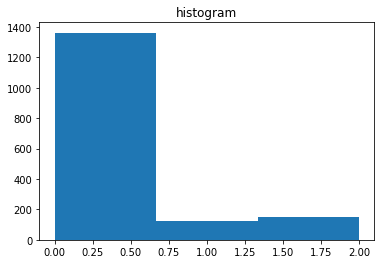

In [47]:
plt.hist(train_labels, bins = 3) 
plt.title("histogram") 
plt.show()

**Normalization**

In [48]:
train_images, test_images = train / 255.0, test / 255.0

**Creating VGGA 16 (I am not using it ) **

In [49]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
'''
model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(75,50,3)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))  ## END BLOCK 1
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))   ## END BLOCK 2
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 3 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 4 
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 5 
model.add(layers.Flatten())    ## converting to vector 
model.add(layers.Dense(4096, activation="relu"))    ## 1st FC layer 
model.add(layers.Dense(4096, activation="relu"))    ## 2st FC layer 
model.add(layers.Dense(10, activation="softmax"))    ## output layer 




model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

'''

'\nmodel = models.Sequential()\n\nmodel.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(75,50,3)))\nmodel.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))  ## END BLOCK 1\nmodel.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))   ## END BLOCK 2\nmodel.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))\nmodel.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))    ## END BLOCK 3 \nmodel.add(layers.Conv2D(filters=512,kernel_size=(3,3),padding="same", activa

In [50]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
out_classes = 3
# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(75,50, 3))
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(out_classes, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()



58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 25, 128)       147584    
______________________________________________________________

Training the model and save it

Epoch 1/5
6/6 [==============================] - 59s 4s/step - loss: 0.8258 - accuracy: 0.6481 - val_loss: 0.4543 - val_accuracy: 0.9021

Epoch 00001: saving model to /content/drive/MyDrive/MLProject/Glasses_Model2/VGG1616-01-0.9021.h5
Epoch 2/5
6/6 [==============================] - 5s 785ms/step - loss: 0.5835 - accuracy: 0.8332 - val_loss: 0.4500 - val_accuracy: 0.9021

Epoch 00002: saving model to /content/drive/MyDrive/MLProject/Glasses_Model2/VGG1616-02-0.9021.h5
Epoch 3/5
6/6 [==============================] - 5s 790ms/step - loss: 0.5533 - accuracy: 0.8305 - val_loss: 0.4054 - val_accuracy: 0.9021

Epoch 00003: saving model to /content/drive/MyDrive/MLProject/Glasses_Model2/VGG1616-03-0.9021.h5
Epoch 4/5
6/6 [==============================] - 5s 790ms/step - loss: 0.5204 - accuracy: 0.8214 - val_loss: 0.3535 - val_accuracy: 0.9021

Epoch 00004: saving model to /content/drive/MyDrive/MLProject/Glasses_Model2/VGG1616-04-0.9021.h5
Epoch 5/5
6/6 [==============================] - 5

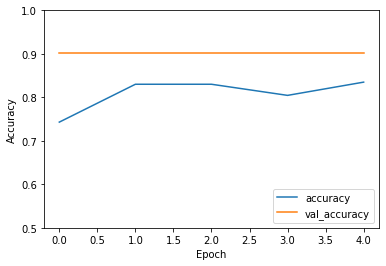

In [51]:
from keras.callbacks import ModelCheckpoint
# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "/content/drive/MyDrive/MLProject/Glasses_Model2/VGG1616-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]

# initialize the number of epochs and batch size
EPOCHS = 5
BS = 256
# train the network
history = model.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS, callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#75, 50, 3

Testing the prediction

In [52]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
print(len(y_hat))
count_truth=0;
count_false=0
for i, index in enumerate(range(len(y_hat)), start=0):
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    #ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    print("The prediction:"+class_names[predict_index]+"\t \t The truth:"+class_names[true_index])
    if (predict_index==true_index):
      count_truth=count_truth+1
    else:
      count_false=count_false+1

print("Number of right prediction :"+str(count_truth))
print("Number of wrong prediction :"+str(count_false))

378
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:Medical Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:Medical Glasses
The prediction:No Glasses	 	 The truth:Sun Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:Medical Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 T

<Figure size 1440x1440 with 0 Axes>

**Model Prediction with images**

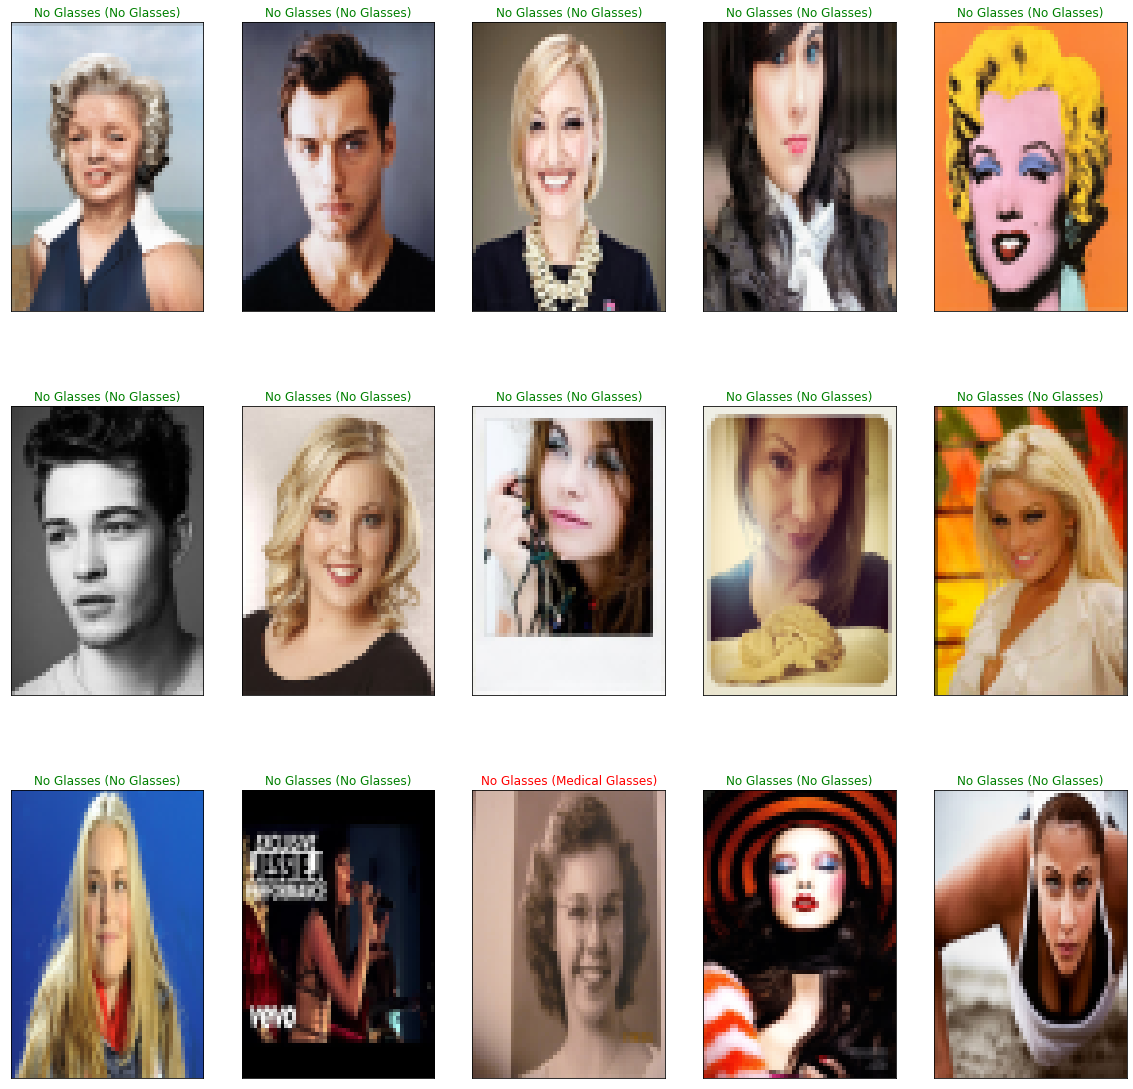

In [61]:
import pdb
y_hat = model.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predicted_classes.append(class_names[predict_index])
    x=int(test_labels[index])
    true_index =x 
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

**Evaluation Table**


In [62]:
#from keras.models import load_model

# here you need to specify the saved model from before
#filepath = "/content/ResNet-02-0.1784.h5"

# load the model
#new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print('confusion Matrix :')
print(confusion_matrix(test_labels,y_pred))

print(classification_report(test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(test_labels, y_pred , average="macro"))
print(recall_score(test_labels, y_pred , average="macro"))

print(f1_score(test_labels, y_pred , average="macro"))
print(f1_score(test_labels, y_pred , average="micro"))
print(f1_score(test_labels, y_pred , average="weighted"))



confusion Matrix :
[[341   0   0]
 [ 32   0   0]
 [  5   0   0]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       341
         1.0       0.00      0.00      0.00        32
         2.0       0.00      0.00      0.00         5

    accuracy                           0.90       378
   macro avg       0.30      0.33      0.32       378
weighted avg       0.81      0.90      0.86       378

0.30070546737213405
0.3333333333333333
0.31617987946221604
0.9021164021164021
0.8556931658461562


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Using the built-in Keras code and weights of ResNet**

In [63]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
out_classes = 3
# load model without classifier layers
model2 = ResNet50(include_top=False, weights="imagenet", input_shape=(75, 50, 3)) 
    

# add new classifier layers
flat1 = layers.Flatten()(model2.layers[-1].output)
output = layers.Dense(out_classes, activation='softmax')(flat1)


# define new model
model2 = Model(inputs=model2.inputs, outputs=output)

model2.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 75, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 81, 56, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 38, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 38, 25, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

**Train Resnet and save the model 2**

Epoch 1/10
6/6 [==============================] - 21s 2s/step - loss: 1.2279 - accuracy: 0.6046 - val_loss: 0.4964 - val_accuracy: 0.9021

Epoch 00001: saving model to /content/drive/MyDrive/MLProject/Glasses_model_Resnet/Resnet-01-0.9021.h5
Epoch 2/10
6/6 [==============================] - 5s 801ms/step - loss: 0.1301 - accuracy: 0.9542 - val_loss: 0.6049 - val_accuracy: 0.9021

Epoch 00002: saving model to /content/drive/MyDrive/MLProject/Glasses_model_Resnet/Resnet-02-0.9021.h5
Epoch 3/10
6/6 [==============================] - 5s 803ms/step - loss: 0.0230 - accuracy: 0.9961 - val_loss: 0.6408 - val_accuracy: 0.9021

Epoch 00003: saving model to /content/drive/MyDrive/MLProject/Glasses_model_Resnet/Resnet-03-0.9021.h5
Epoch 4/10
6/6 [==============================] - 5s 803ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.6674 - val_accuracy: 0.9021

Epoch 00004: saving model to /content/drive/MyDrive/MLProject/Glasses_model_Resnet/Resnet-04-0.9021.h5
Epoch 5/10
6/6 [==========

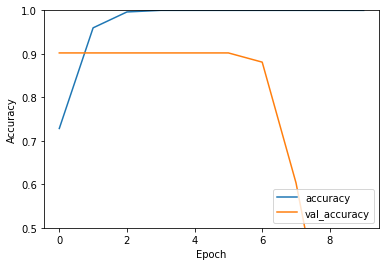

In [64]:
from keras.callbacks import ModelCheckpoint
#epoch 6 was the best
# define the checkpoint, have a look here for the arguments: https://keras.io/api/callbacks/model_checkpoint/
filepath = "/content/drive/MyDrive/MLProject/Glasses_model_Resnet/Resnet-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]

# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256
# train the network
history = model2.fit(train_images, train_labels, shuffle= True,
	validation_data=(test_images, test_labels), steps_per_epoch=len(train_images) // BS,
	epochs=EPOCHS, callbacks=callbacks_list)

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#75, 50, 3

**Testing Predictions**

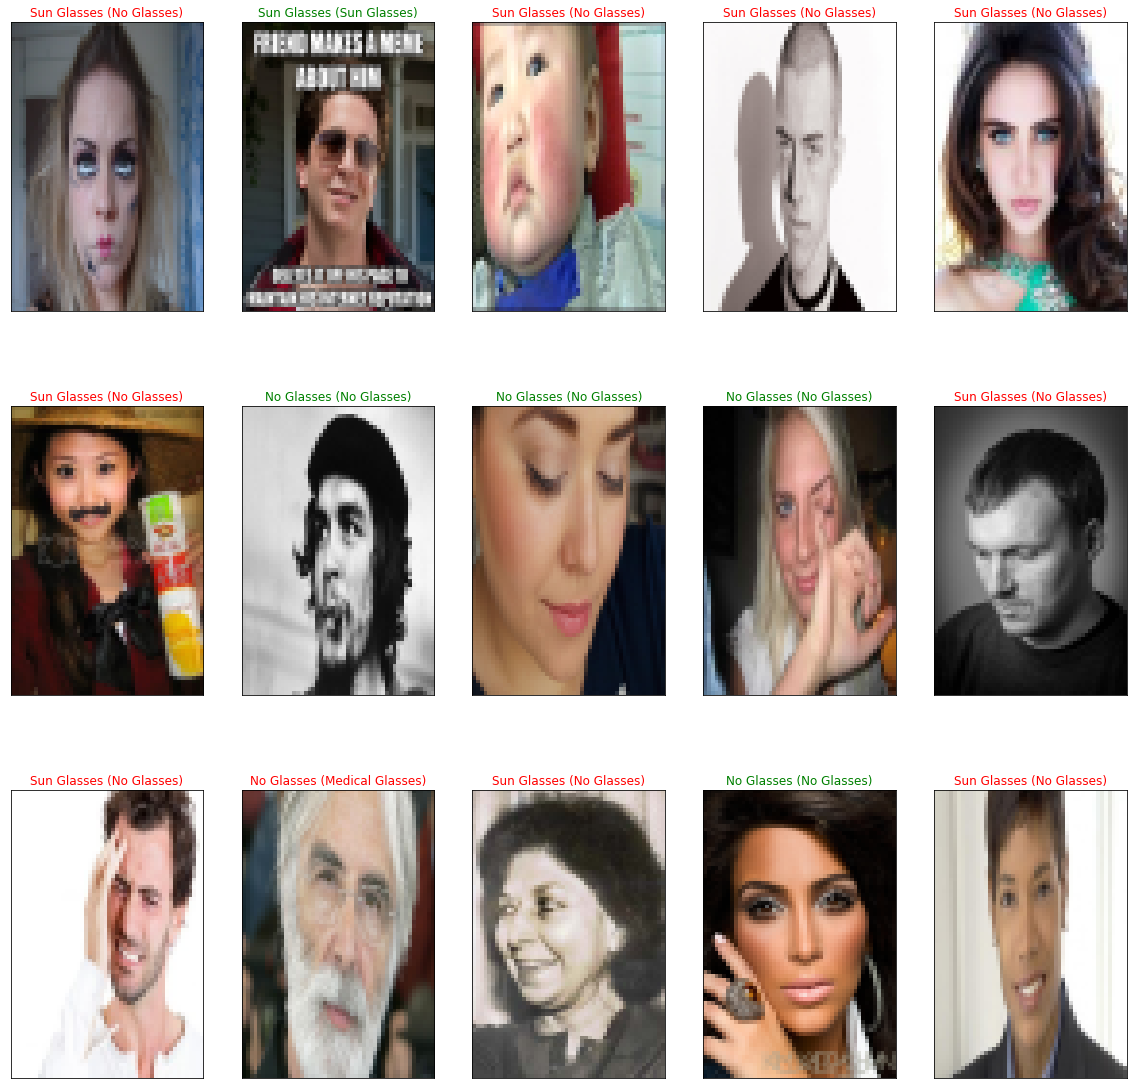

In [79]:
import pdb
y_hat = model2.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    predicted_classes.append(class_names[predict_index])
    x=int(test_labels[index])
    true_index =x
    true_classes.append(class_names[true_index])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
     
   # true_index=1
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

**Evaluation Matrix**

In [67]:
#from keras.models import load_model

# here you need to specify the saved model from before
#filepath = "/content/ResNet-02-0.1784.h5"

# load the model
#new_model = load_model(filepath)

# for the metrics and details have a look here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
y_pred1 = model2.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)

print('confusion Matrix :')
print(confusion_matrix(test_labels,y_pred))

print(classification_report(test_labels, y_pred))


# Print f1, precision, and recall scores
print(precision_score(test_labels, y_pred , average="macro"))
print(recall_score(test_labels, y_pred , average="macro"))

print(f1_score(test_labels, y_pred , average="macro"))
print(f1_score(test_labels, y_pred , average="micro"))
print(f1_score(test_labels, y_pred , average="weighted"))



confusion Matrix :
[[ 69   0 272]
 [  6   0  26]
 [  0   0   5]]
              precision    recall  f1-score   support

         0.0       0.92      0.20      0.33       341
         1.0       0.00      0.00      0.00        32
         2.0       0.02      1.00      0.03         5

    accuracy                           0.20       378
   macro avg       0.31      0.40      0.12       378
weighted avg       0.83      0.20      0.30       378

0.3121672167216722
0.4007820136852395
0.1213994338994339
0.19576719576719578
0.299689232724947


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Test Resnet**

In [ ]:
import pdb
y_hat = model2.predict(test_images)
predicted_classes=[]
true_classes=[]
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
print(len(y_hat))
count_truth=0;
count_false=0
for i, index in enumerate(range(len(y_hat)), start=0):
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    predicted_classes.append(class_names[predict_index])
    true_classes.append(class_names[true_index])
    #ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    x=int(test_labels[index])
    true_index =x 
    print("The prediction:"+class_names[predict_index]+"\t \t The truth:"+class_names[true_index])
    if (predict_index==true_index):
      count_truth=count_truth+1
    else:
      count_false=count_false+1

print("Number of right prediction :"+str(count_truth))
print("Number of wrong prediction :"+str(count_false))

378
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:Medical Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:Medical Glasses
The prediction:No Glasses	 	 The truth:Sun Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:Medical Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 The truth:No Glasses
The prediction:No Glasses	 	 T

<Figure size 1440x1440 with 0 Axes>

**Features Map**

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 50, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


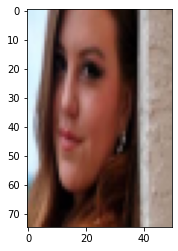

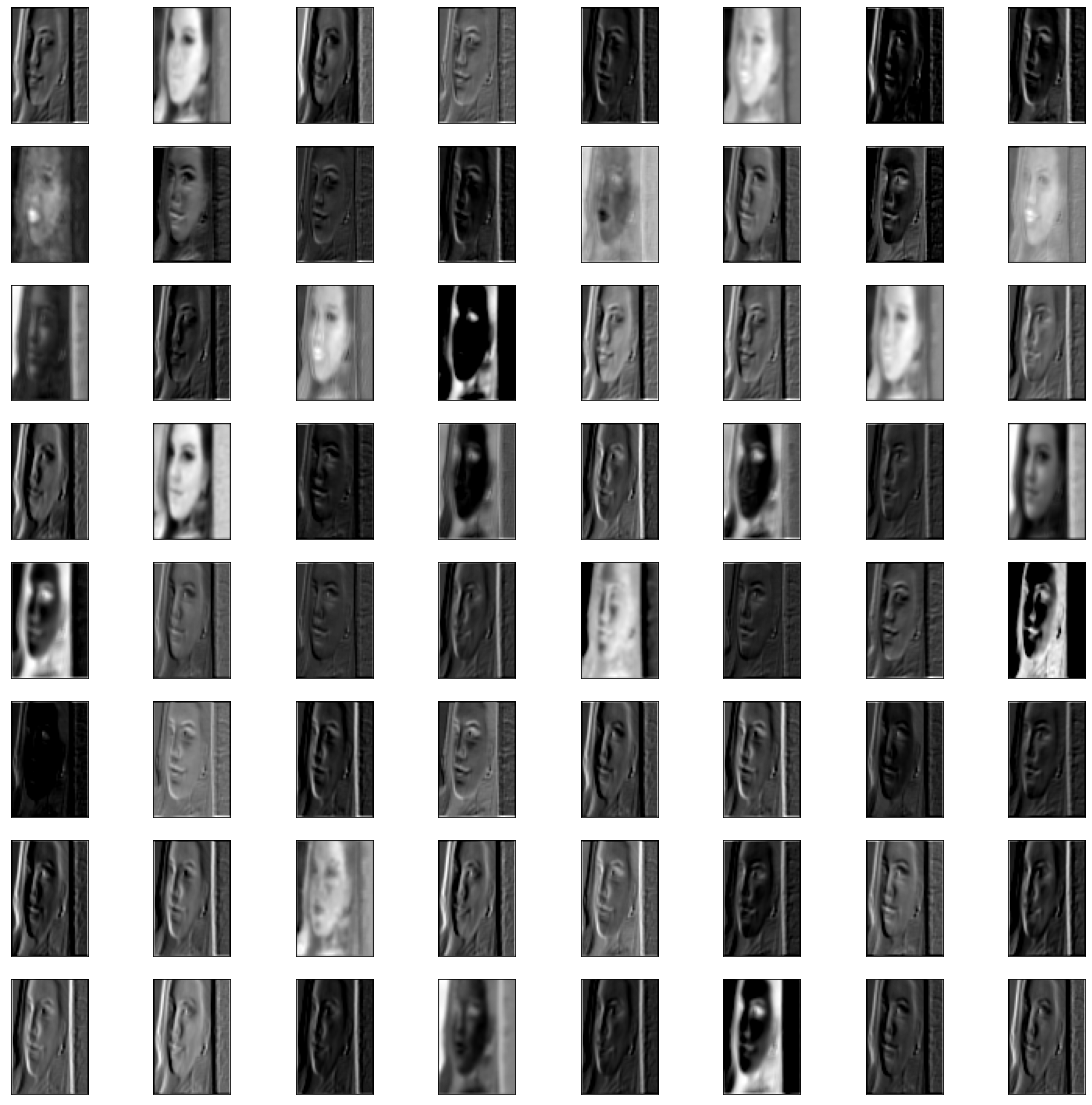

In [ ]:
from numpy import expand_dims
from keras.models import Model

# redefine model to output right after the first conv layer
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)   ### here you need to select only conv or pooling layers; the index should always start from 1; index 0 corresponds to the input layer
model1.summary()
# load the image with the required shape
img = test_images[0]   ### if you want change the index here to load another image from the test/training set
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first conv layer
feature_maps = model1.predict(img)
# plot all 64 maps in 8x8 squares   
### square1 times square2 should always be the number of output feature maps of the layer 
### (in other words should be the last number of the 'output shape' column of the model summary)
square1 = 8
square2 = 8
ix = 1

# Display the input image
plt.imshow(img[0])


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()